📘 Nova Financial Solutions – Sentiment Analysis & Market Insights
🧠 Project Introduction
Nova Financial Solutions is focused on leveraging natural language processing (NLP) and data analytics to extract actionable insights from financial news. This project aims to understand how the sentiment of headlines correlates with stock market behavior. By analyzing news publication patterns, sentiment trends, and word frequencies, we strive to develop predictive tools that support smarter investment strategies.

This notebook begins by importing essential libraries for data analysis, visualization, and text processing. These tools lay the foundation for the Exploratory Data Analysis (EDA) and sentiment classification that follows.

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

Importing the Data

In [300]:
file_path = r"C:\Users\User\Desktop\Week_1\raw_analyst_ratings.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#Drop the unnamed column ,since it is the same as the index

In [301]:
df = df.drop('Unnamed: 0', axis=1)


To see the cleaned dataset after removing the 'Unnamed: 0' column, use:

In [302]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [ ]:
## Checking for Null Values

To ensure data quality, it's important to check for missing (null) values in the dataset. This helps identify columns that may require cleaning or imputation before further analysis.

In [304]:
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

📊 Descriptive Statistics: Headline Length
To begin the textual analysis, we examine the length of each headline to understand the distribution of text size in the dataset. This is a foundational step in natural language processing, as it helps reveal how concise or verbose the headlines typically are, which may influence sentiment or readability.

🧮 Headline Length Statistics (in characters):
Mean Length         : 73.12
Median Length       : 64.00
Standard Deviation  : 40.74
Maximum Length      : 512.00
Minimum Length      : 3.00


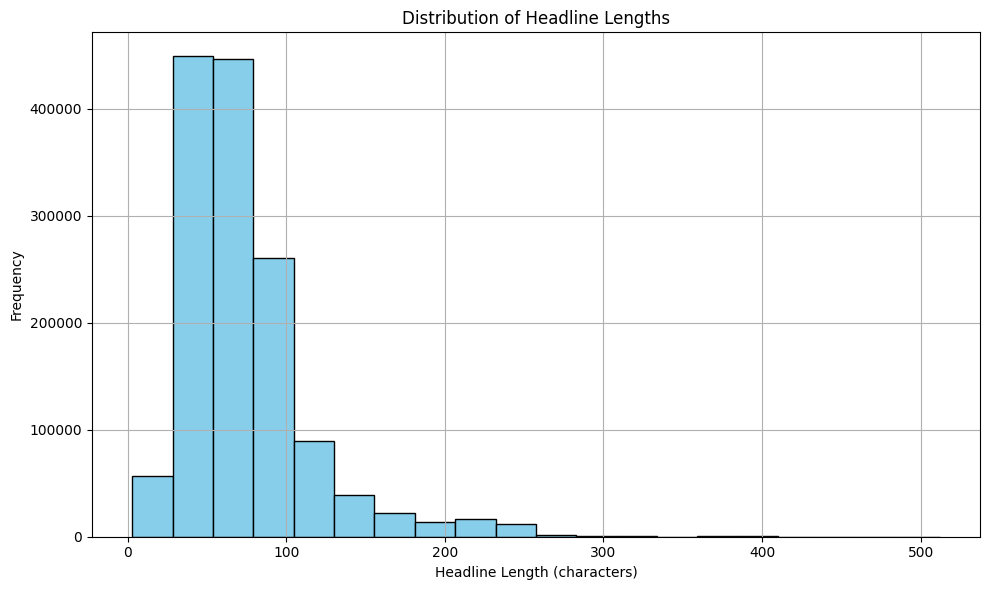

In [305]:


# Calculate character lengths
df['headline_length'] = df['headline'].astype(str).str.len()

# Compute statistics
length_stats = {
    'Mean Length': df['headline_length'].mean(),
    'Median Length': df['headline_length'].median(),
    'Standard Deviation': df['headline_length'].std(),
    'Maximum Length': df['headline_length'].max(),
    'Minimum Length': df['headline_length'].min()
}

# Display neatly formatted summary
print("🧮 Headline Length Statistics (in characters):")
for stat, value in length_stats.items():
    print(f"{stat:<20}: {value:.2f}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length (characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


🧮 Headline Length Summary
The shortest headline has 3 characters in it.

The longest headline has 512 characters in it.

On average, a headline contains 73.1 characters.

The 25th percentile of headlines is at 47 characters, meaning 25% of the headlines are shorter than this.

The 75th percentile of headlines is at 87 characters, meaning 75% of the headlines are shorter than this

📰 Publisher Activity Analysis
To understand the sources contributing to our dataset, we analyze the number of articles published by each publisher. Identifying the most active publishers helps us:

. Determine which sources dominate the news feed.

. Assess potential bias or influence of certain publishers.

. Guide further analysis on news reliability and reporting trends.

Without the module 

📰 Top 20 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


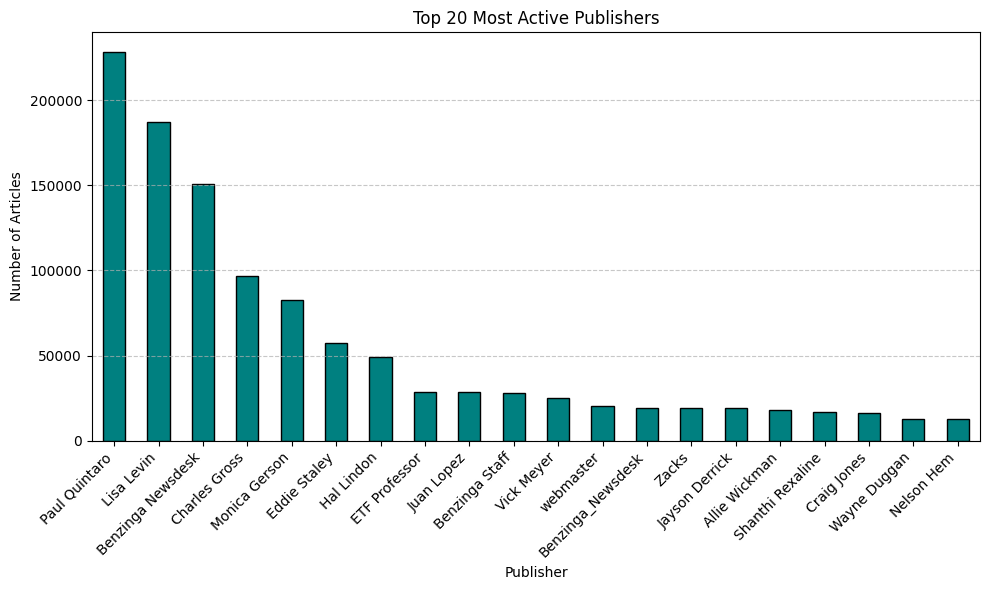

In [306]:


# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display top 20 publishers
print("📰 Top 20 Publishers by Article Count:")
print(publisher_counts.head(top_n))

# Optional: Display top 10 as a bar plot
top_n = 20
plt.figure(figsize=(10, 6))
publisher_counts.head(top_n).plot(kind='bar', color='teal', edgecolor='black')
plt.title(f"Top {top_n} Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


📰 Top 20 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


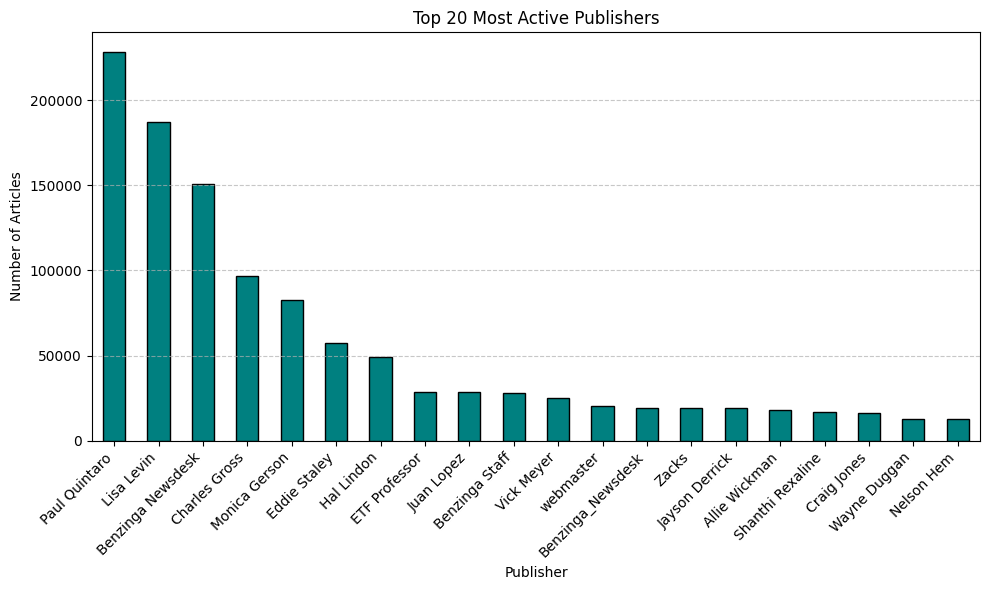

In [307]:
import sys
import os

# Go one level up from 'notebooks/' to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import the plotting function from your module
from scripts.article_utils import plot_top_publishers
plot_top_publishers(df, top_n=20)





📰 Top 20 Publishers by Article Count
The dataset is dominated by a few key contributors. Below are the top 20 publishers based on the number of articles they have produced:

Paul Quintaro leads significantly with 228,373 articles, indicating a major influence on the dataset.

Lisa Levin and Benzinga Newsdesk follow with 186,979 and 150,484 articles respectively.

Other frequent contributors include Charles Gross, Monica Gerson, and Eddie Staley, each with tens of thousands of entries.

Publishers such as Zacks, ETF Professor, and Benzinga Staff also appear prominently, suggesting a heavy reliance on financial and market analysis outlets.

📌 Insight:
The concentration of articles among a few publishers suggests that certain voices heavily shape the sentiment and tone of the dataset. This may introduce bias or recurring narrative patterns that are important to consider in sentiment and correlation analyses.

📅 Publication Date Analysis

In [308]:

df['date_conv'] = pd.to_datetime(df['date'], utc=True, format="mixed")


In [309]:
num_invalid_dates = df['date'].isna().sum()
print(f"Number of invalid or unconverted dates (NaT): {num_invalid_dates}")


Number of invalid or unconverted dates (NaT): 0


In [310]:
# Extract year, month, day, weekday, and hour using the datetime column
df['year'] = df['date_conv'].dt.year
df['month'] = df['date_conv'].dt.month
df['day'] = df['date_conv'].dt.day
df['weekday'] = df['date_conv'].dt.day_name()  # e.g., 'Monday', 'Tuesday'
df['hour'] = df['date_conv'].dt.hour

In [311]:
df[['date_conv', 'year', 'month', 'day', 'weekday', 'hour']].head()


,date_conv,year,month,day,weekday,hour
0,2020-06-05 14:30:54+00:00,2020,6,5,Friday,14
1,2020-06-03 14:45:20+00:00,2020,6,3,Wednesday,14
2,2020-05-26 08:30:07+00:00,2020,5,26,Tuesday,8
3,2020-05-22 16:45:06+00:00,2020,5,22,Friday,16
4,2020-05-22 15:38:59+00:00,2020,5,22,Friday,15


In [ ]:
# Count the number of articles published each year and sort by year (chronological order)
yearly_trends = df['year'].value_counts().sort_index()

# Display the yearly publication counts
print(yearly_trends)

year
2009     11489
2010     81319
2011    131322
2012    122649
2013    121529
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
Name: count, dtype: int64
11489


📈 Yearly News Publication Trends
The dataset shows a clear upward trend in the number of financial news articles published annually from 2009 to 2019:

The number of articles increased dramatically from 11,489 in 2009 to a peak of 150,380 in 2019.

The sharp growth between 2010 and 2015 suggests a rising demand for financial news coverage and digital content.

A slight drop is seen in 2020 (105,214 articles), which may reflect the impact of external factors such as the COVID-19 pandemic on media operations or content output.

Notable peaks in 2018 and 2019 could indicate high market activity or volatility during those years, driving more reporting.

In [ ]:
monthly_trends = df['month'].value_counts().sort_index()
print(monthly_trends)

month
1     121545
2     122836
3     121949
4     121813
5     130340
6     106598
7     110764
8     124041
9      96089
10    124800
11    121430
12    105123
Name: count, dtype: int64


In [ ]:
weekday_trends = df['weekday'].value_counts().sort_index()
print(weekday_trends)

weekday
Friday       217918
Monday       265139
Saturday       7759
Sunday        16466
Thursday     302619
Tuesday      296505
Wednesday    300922
Name: count, dtype: int64


In [ ]:
day_trends = df['day'].value_counts().sort_index()
print(day_trends)

day
1     46582
2     46894
3     45797
4     45353
5     47128
6     50032
7     50068
8     50688
9     48692
10    47799
11    46063
12    48607
13    47771
14    46711
15    44640
16    44203
17    44612
18    43857
19    44913
20    46440
21    44597
22    43156
23    46518
24    44041
25    43007
26    45565
27    47575
28    45048
29    41794
30    41997
31    27180
Name: count, dtype: int64


In [ ]:
hourly_trends = df['hour'].value_counts().sort_index()
print(hourly_trends)

hour
0     1351472
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64


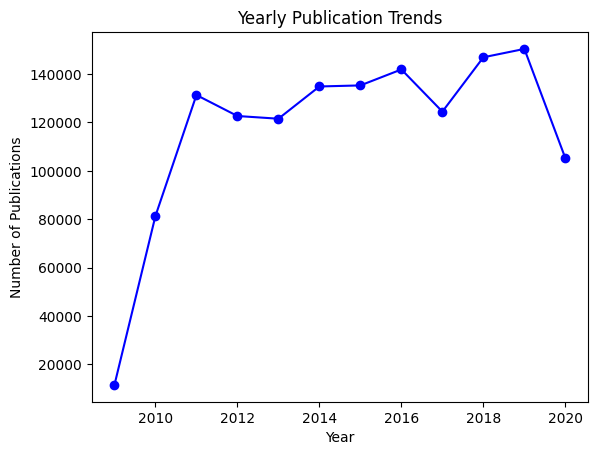

In [ ]:
# Plot yearly trends
yearly_trends.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Publication Trends')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

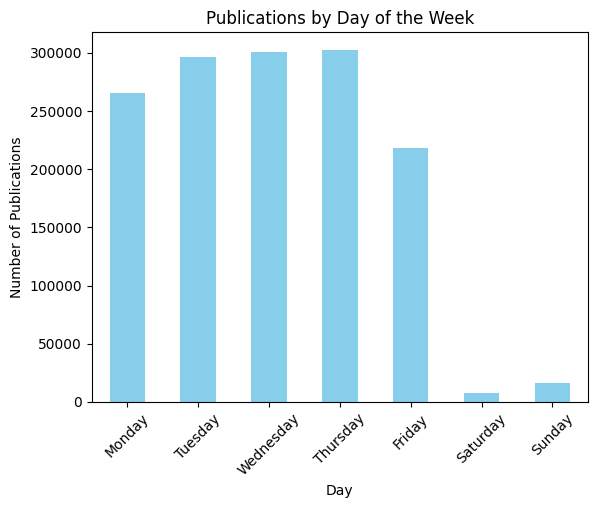

In [ ]:
# Define the correct order of weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the Series to enforce the desired weekday order
weekday_trends = weekday_trends.reindex(ordered_days)

# Now plot in correct order
weekday_trends.plot(kind='bar', color='skyblue')
plt.title('Publications by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()


In [ ]:


# Get counts of each weekday
weekday_counts = df['weekday'].value_counts().reindex(ordered_days)

# Calculate percentage
weekday_percentages = (weekday_counts / weekday_counts.sum()) * 100

# Combine into a DataFrame
weekday_stats = pd.DataFrame({
    'Count': weekday_counts,
    'Percentage': weekday_percentages.round(2)
})

# Display the table
print(weekday_stats)


            Count  Percentage
weekday                      
Monday     265139       18.84
Tuesday    296505       21.07
Wednesday  300922       21.38
Thursday   302619       21.50
Friday     217918       15.48
Saturday     7759        0.55
Sunday      16466        1.17


📊 Weekly Publication Patterns
From both the printed statistics and the visual plot, we can derive the following conclusions regarding news publication frequency across different days of the week:

🗓️ Weekdays dominate news publication:

Thursday, Wednesday, and Tuesday are the most active days, each contributing roughly 21% of total publications.

Monday follows with around 18.8%, slightly lower but still significant.

Friday sees a noticeable dip, with only 15.48% of the articles published.

📉 Weekends show minimal activity:

Sunday accounts for just 1.17% of all publications.

Saturday is even lower at 0.55%.

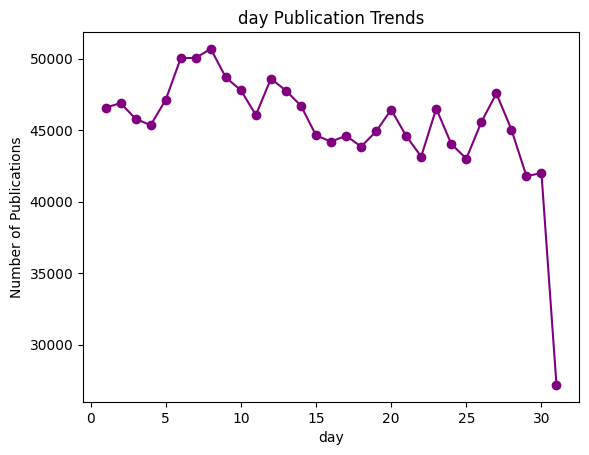

In [ ]:
# Plot day trends
day_trends.plot(kind='line', marker='o', color='purple')
plt.title('day Publication Trends')
plt.xlabel('day')
plt.ylabel('Number of Publications')
plt.show()

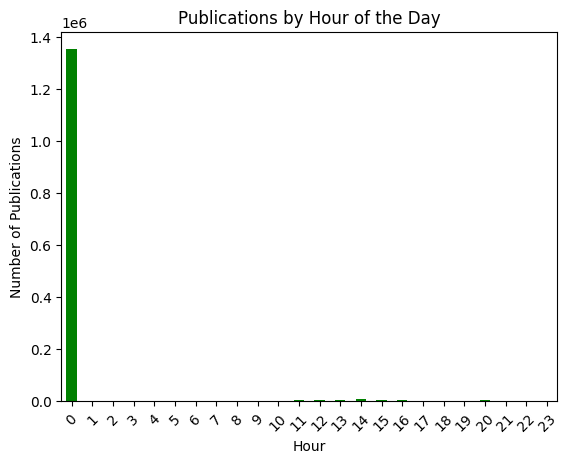

In [ ]:
#plot hourly trends

hourly_trends.plot(kind='bar', color='green')
plt.title('Publications by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count the number of publications per hour
hourly_counts = df['hour'].value_counts().sort_index()

# Calculate the percentage for each hour
hourly_percentages = (hourly_counts / hourly_counts.sum()) * 100

# Combine into a DataFrame
hourly_stats = pd.DataFrame({
    'Count': hourly_counts,
    'Percentage': hourly_percentages.round(2)
})

# Display the table
print(hourly_stats)


        Count  Percentage
hour                     
0     1351472       96.03
1          82        0.01
2          48        0.00
3          27        0.00
4          67        0.00
5          14        0.00
6          57        0.00
7          93        0.01
8        1469        0.10
9        1829        0.13
10       2476        0.18
11       5033        0.36
12       5527        0.39
13       5965        0.42
14       7669        0.54
15       5701        0.41
16       5732        0.41
17       2710        0.19
18       2075        0.15
19       1612        0.11
20       3939        0.28
21       2800        0.20
22        704        0.05
23        227        0.02


🔍 Key Insights:
A huge spike in publications occurs at hour 00 (midnight), which accounts for 96.03% of all articles. This likely represents default timestamps for bulk-uploaded articles or missing precise times.

After 8 AM, there is a gradual increase in activity, peaking between 11 AM and 4 PM, aligning with US market hours.

Post-6 PM, publication frequency drops significantly.

This analysis helps identify peak publishing windows and can be especially relevant for traders or systems depending on the timing of market news re

○	Text Analysis(Topic Modeling):

In [ ]:

# Downloading nltk resources for performing NLP and sentiment analysis
nltk.download([
    "vader_lexicon",
    "punkt_tab",
    "stopwords",
    "averaged_perceptron_tagger"
])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# let us initialize NLTK's pre-trained sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

In [ ]:
# apply the sentiment analyzer to obtain the sentiment and intensity of the sentiment
df['headline_sentiment'] = df['headline'].apply(lambda headline: sentiment_analyzer.polarity_scores(headline)["compound"])

In [ ]:
# now we can 
df['sentiment_category'] = pd.cut(x=df['headline_sentiment'] , bins=[-1, -0.7, -0.1, 0.1, 0.7, 1] , labels=["very-negative", "negative", "neutral", "positive", "very-positive"], precision=3)

In [ ]:
# Calculate percentages and convert to DataFrame
sentiment_percentages = (
    df['sentiment_category']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

# Rename columns
sentiment_percentages.columns = ['Sentiment', 'Percentage']

# Display the table
print(sentiment_percentages)


       Sentiment  Percentage
0        neutral       53.53
1       positive       28.71
2       negative       14.95
3  very-positive        2.23
4  very-negative        0.57


<Axes: xlabel='sentiment_category', ylabel='proportion'>

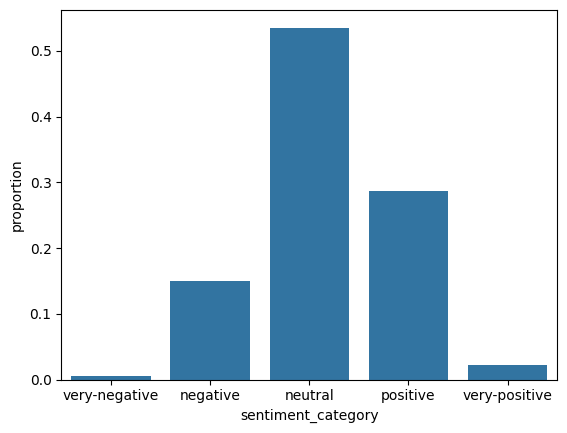

In [ ]:
sns.barplot(df['sentiment_category'].value_counts(normalize=True))

📊 Sentiment Distribution Summary
53.54% of the dataset has a headline with a neutral sentiment

28.71% of the dataset has a headline with a positive sentiment

14.95% of the dataset has a headline with a negative sentiment

2.23% of the dataset has a headline with a very-positive sentiment

0.57% of the dataset has a headline with a very-negative sentiment

let us try to extract common words that are found in the head

In [ ]:


string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:


# Define sets of stopwords and punctuation for filtering
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def get_tokens(headline: str):
    '''
    Tokenizes a headline and returns a list of meaningful words
    by removing stopwords and punctuation.

    Args:
        headline (str): The headline text to process.

    Returns:
        List[str]: A list of clean tokens from the headline.
    '''
    # Convert text to lowercase
    headline = headline.lower()

    # Tokenize the text
    tokens = word_tokenize(headline)

    # Remove stopwords and punctuation
    filtered_tokens = [
        token for token in tokens
        if token not in stop_words and token not in punctuation
    ]

    return filtered_tokens


In [ ]:
words_df = pd.DataFrame()
words_df = df["headline"].apply(get_tokens)

In [ ]:
# Flatten the list of tokenized words
all_words = [word for tokens in words_df for word in tokens]

In [ ]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common()

In [ ]:
most_common_words[:50]

[("'s", 206646),
 ('stocks', 161702),
 ('vs', 138835),
 ('eps', 128801),
 ('est', 122289),
 ('shares', 114140),
 ('reports', 108688),
 ('update', 91645),
 ('market', 91080),
 ('earnings', 87183),
 ('sales', 79528),
 ('top', 78493),
 ('benzinga', 74466),
 ('pt', 73059),
 ('announces', 66531),
 ('price', 64217),
 ('buy', 63928),
 ('downgrades', 61942),
 ('trading', 61146),
 ('raises', 57793),
 ('upgrades', 56802),
 ('target', 54669),
 ('maintains', 52960),
 ('52-week', 49802),
 ('higher', 48150),
 ('new', 47875),
 ('session', 45333),
 ('says', 43123),
 ('moving', 42248),
 ('q4', 40448),
 ('stock', 39334),
 ('inc.', 38720),
 ('q1', 38433),
 ('sees', 37971),
 ('estimate', 37938),
 ('q2', 37578),
 ('mid-day', 37276),
 ('q3', 36818),
 ('energy', 35604),
 ('initiates', 34981),
 ('us', 34970),
 ('companies', 34390),
 ('neutral', 34352),
 ('lower', 34184),
 ('bank', 34058),
 ('lowers', 33855),
 ('scheduled', 32835),
 ('coverage', 32323),
 ('company', 31012),
 ('morgan', 30970)]

📈 Common Financial Terms Identified in Headlines
From the tokenized headlines, we can identify several frequently used financial terms:

Q1, Q2, Q3, Q4: Represent the four financial quarters in a fiscal year, each covering a 3-month reporting period for company performance.

Shares: Units of ownership in a company.

Earnings: Refers to a company’s profit.

EPS (Earnings Per Share): A key financial metric indicating a company’s profitability on a per-share basis.

Price: Often relates to stock price or share value.

Stock: Indicates equity in a company or references to stock market activity.

Estimate: Refers to analysts' or companies' projections for financial performance.

📉 Words Indicating Market Movement
Headlines also commonly include terms that reflect market direction or value changes:

Higher: Suggests an increase, rise, or upward movement.

Lower: Indicates a decrease, drop, or downward trend.

In [ ]:
3,

(3,)

In [ ]:
# count the daily headlines
daily_headlines = df.groupby('day').size()

# create a DataFrame
time_series_data = pd.DataFrame({'day' : daily_headlines.index , 'publications' : daily_headlines.values})

# print out the timeseries data
time_series_data


,day,publications
0,1,46582
1,2,46894
2,3,45797
3,4,45353
4,5,47128
5,6,50032
6,7,50068
7,8,50688
8,9,48692
9,10,47799


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
daily_counts = df['date'].dt.date.value_counts().sort_index()


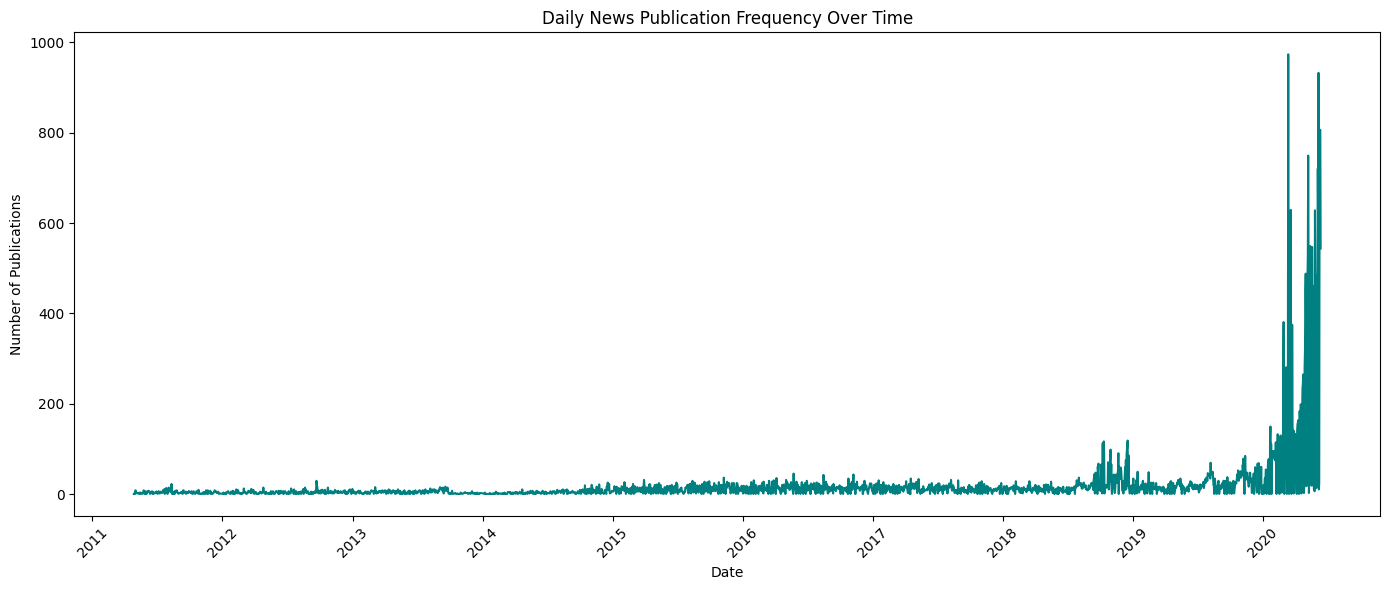

In [ ]:


plt.figure(figsize=(14, 6))
daily_counts.plot(kind='line', color='teal')
plt.title('Daily News Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the hour of publication
df['hour'] = df['date'].dt.hour


In [ ]:
hourly_publications = df['hour'].value_counts().sort_index()


In [ ]:
hourly_percentages = (hourly_publications / hourly_publications.sum() * 100).round(2)
hourly_distribution = pd.DataFrame({
    'Publications': hourly_publications,
    'Percentage': hourly_percentages
})


In [ ]:
print(hourly_distribution)


      Publications  Percentage
hour                          
0.0             67        0.12
1.0             14        0.03
2.0             57        0.10
3.0             93        0.17
4.0           1469        2.62
5.0           1829        3.27
6.0           2476        4.42
7.0           5033        8.99
8.0           5527        9.87
9.0           5965       10.65
10.0          7669       13.70
11.0          5701       10.18
12.0          5732       10.24
13.0          2710        4.84
14.0          2075        3.71
15.0          1612        2.88
16.0          3939        7.04
17.0          2800        5.00
18.0           704        1.26
19.0           227        0.41
20.0           131        0.23
21.0            82        0.15
22.0            48        0.09
23.0            27        0.05


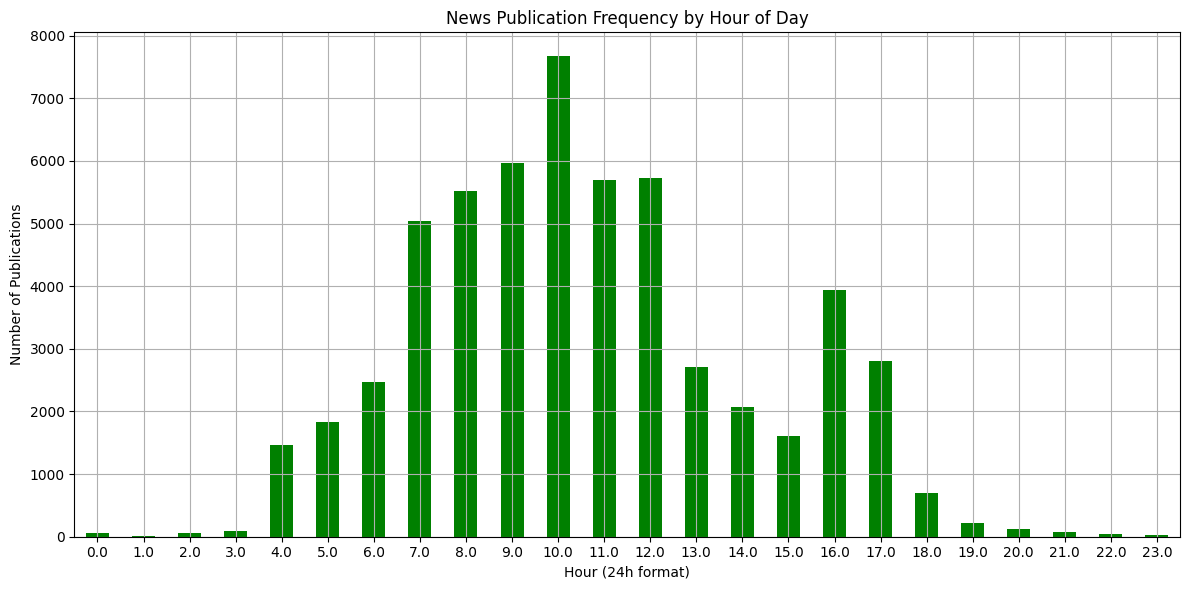

In [ ]:


hourly_publications.plot(kind='bar', color='green', figsize=(12, 6))
plt.title('News Publication Frequency by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Publications')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


🕒 News Publication Timing Analysis
The bar chart above shows the distribution of news article publications by hour (in 24-hour format). Key insights:

🔼 Peak publication hours are between 7:00 and 12:00, with the highest volume around 10:00 AM.

📈 This aligns with pre-market and early trading hours in U.S. stock markets, suggesting publishers aim to release major updates before or during early market movement.

📉 Publication volume drops significantly after 13:00 (1 PM) and is minimal during late evening and night hours.

⚙️ Implication for traders: Automated trading systems or alert-based strategies should prioritize scanning news feeds during the early hours of the day to capture the majority of market-moving headlines.

📊 Most Active Publishers
To understand the distribution of articles by publisher, we can analyze the number of headlines contributed by each publisher:

In [ ]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display top publishers
publisher_counts.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [ ]:
# Get top 10 publishers based on article count
top_publishers = df['publisher'].value_counts().head(10).index

# Filter the dataset for only those top publishers
top_publishers_df = df[df['publisher'].isin(top_publishers)]

# Group by publisher and sentiment category
publisher_sentiment = top_publishers_df.groupby(['publisher', 'sentiment_category']).size().unstack(fill_value=0)

# Normalize to percentage
publisher_sentiment_percent = publisher_sentiment.div(publisher_sentiment.sum(axis=1), axis=0) * 100

# Display sentiment distribution for top publishers
publisher_sentiment_percent



C:\Users\User\AppData\Local\Temp\ipykernel_13136\1644426984.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  publisher_sentiment = top_publishers_df.groupby(['publisher', 'sentiment_category']).size().unstack(fill_value=0)


sentiment_category,very-negative,negative,neutral,positive,very-positive
publisher,,,,,
Benzinga Newsdesk,1.251296,23.786582,41.716063,28.137875,5.108184
Benzinga Staff,0.241872,7.732802,63.011311,26.990112,2.023903
Charles Gross,0.698838,11.841996,44.442377,41.052599,1.964190
ETF Professor,0.354523,10.519850,66.917056,21.078311,1.130261
Eddie Staley,0.394732,12.006148,55.639781,29.355154,2.604185
Hal Lindon,0.381267,8.934288,58.305299,29.722511,2.656635
Juan Lopez,1.223715,26.007455,53.294887,19.234827,0.239117
Lisa Levin,0.100011,16.536082,58.224720,24.464245,0.674942
Monica Gerson,0.100753,12.422918,50.246419,36.567128,0.662782


In [ ]:


# Filter rows where publisher looks like an email
email_publishers = df[df['publisher'].str.contains('@', na=False)]

# Extract the domain from the email (e.g., user@domain.com -> domain.com)
email_publishers['email_domain'] = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')

# Count unique domains
domain_counts = email_publishers['email_domain'].value_counts()

# Display the domain frequency
print(domain_counts)


email_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_13136\2786143379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['email_domain'] = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')


C:\Users\User\AppData\Local\Temp\ipykernel_13136\587948536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['email_domain'] = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')


                        Count  Percentage
email_domain                             
benzinga.com             7937   98.133037
gmail.com                 139    1.718595
andyswan.com                5    0.061820
investdiva.com              2    0.024728
tothetick.com               2    0.024728
eosdetroit.io               1    0.012364
forextraininggroup.com      1    0.012364
stockmetrix.net             1    0.012364


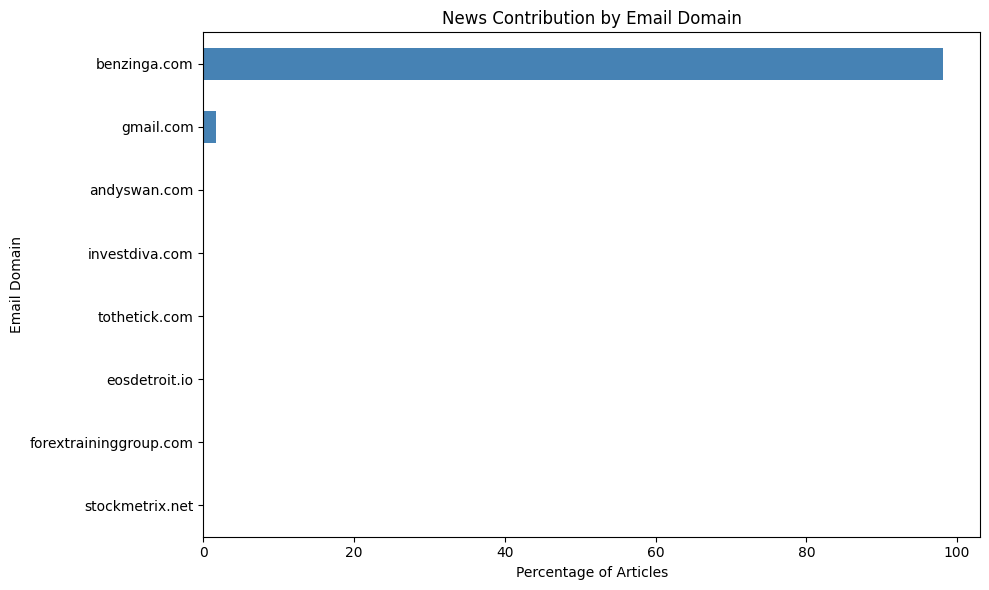

In [ ]:


# Filter rows where publisher is an email
email_publishers = df[df['publisher'].str.contains('@', na=False)]

# Extract domain from email (e.g., john@domain.com → domain.com)
email_publishers['email_domain'] = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')

# Count domains and convert to DataFrame
domain_counts = email_publishers['email_domain'].value_counts()
domain_percentages = (domain_counts / domain_counts.sum()) * 100

# Combine into one DataFrame for display
domain_stats = pd.DataFrame({
    'Count': domain_counts,
    'Percentage': domain_percentages
})

# Print table
print(domain_stats)

# Plot
plt.figure(figsize=(10, 6))
domain_stats['Percentage'].plot(kind='barh', color='steelblue')
plt.title('News Contribution by Email Domain')
plt.xlabel('Percentage of Articles')
plt.ylabel('Email Domain')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()
